In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import datetime

%matplotlib inline

1. Loading the data into a Pandas DataFrame from a file.


In [2]:
df = pd.read_csv('../data/ecommerce_data_1.csv', encoding = 'ISO-8859-1')

2. Display the first three records in the loaded dataset.


In [3]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


3. Renaming the columns for convenience.


In [4]:
df.columns = df.columns.str.lower()

4. Output the current column names.


In [5]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

# Basic Understanding of the Data

5. Output the number of columns and rows in the dataset.


In [6]:
df.shape

(541909, 8)

6. Output the data types of each column.


In [7]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

7. Output the number of null values in each column, sorted in descending order.


In [8]:
df.isna().sum().sort_values(ascending = False)

customerid     135080
description      1454
invoiceno           0
stockcode           0
quantity            0
invoicedate         0
unitprice           0
country             0
dtype: int64

### Date Conversion


8. Converting the `invoicedate` column to the `datetime64[ns]` data type..

In [9]:
df = df.astype({'invoicedate': 'datetime64[ns]'})

# Data Cleaning

### Removing Missing Values (NA)


9. Removing all missing values from the dataset `df` and store the result in a new variable `df_new`.


In [10]:
df_new = df.dropna()

10. Output the number of columns and rows in `df_new`.


In [11]:
df_new.shape

(406829, 8)

11. Output the percentage of rows removed from `df` when missing values were eliminated.


In [12]:
print(
    int(round(1-df_new.shape[0]/df.shape[0], 2)*100),
    '%', 
    sep=''
)

25%


### Removing negative values in `quantity`


12.Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [13]:
df_new.quantity.describe().round(2)

count    406829.00
mean         12.06
std         248.69
min      -80995.00
25%           2.00
50%           5.00
75%          12.00
max       80995.00
Name: quantity, dtype: float64

13. Remove all rows where `quantity` is less than 0 from the dataset `df_new` and save the result back into `df_new`.


In [14]:
df_new = df_new[df_new.quantity >= 0]

In [15]:
df_new.quantity.describe().round(2)

count    397924.00
mean         13.02
std         180.42
min           1.00
25%           2.00
50%           6.00
75%          12.00
max       80995.00
Name: quantity, dtype: float64

# Data Processing

### Changing the data type of `custid`


14. Customer ID should have type "str".

In [16]:
df_new['custid'] = df_new['customerid'].apply(lambda x: str(int(x)))

### Adding the `amountspent` column


15. Adding a column `amountspent` to `df_new`, which is the product of the `quantity` and `unitprice` columns.


In [17]:
df_new['amountspent'] = df_new.quantity * df_new.unitprice

### Adding `month`, `day`, `hour`, and `yearmonth` columns for the invoice


16. Using the `invoicedate` column, creating 4 new columns in the dataset:
- `yearmonth` - year and month of the invoice combined
- `month` - month of the invoice
- `day` - day of the week of the invoice (Monday as first, Sunday as last)
- `hour` - hour of the invice


In [18]:
df_new.insert(loc = 2, column = 'yearmonth', value = df_new.invoicedate.dt.to_period('M'))
df_new.insert(loc = 3, column = 'month', value = df_new.invoicedate.dt.month)
df_new.insert(loc = 4, column = 'day', value = (df_new.invoicedate.dt.dayofweek) + 1)
df_new.insert(loc = 5, column = 'hour', value = df_new.invoicedate.dt.hour)

In [19]:
df_new.head(3)

,invoiceno,stockcode,yearmonth,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,custid,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850,22.00


In [20]:
df_new.dtypes

invoiceno              object
stockcode              object
yearmonth           period[M]
month                   int32
day                     int32
hour                    int32
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
custid                 object
amountspent           float64
dtype: object

# Basic Exploratory Data Analysis (EDA)


17. Create a bar chart showing the number of unique sales per month over the entire available period in the dataset.


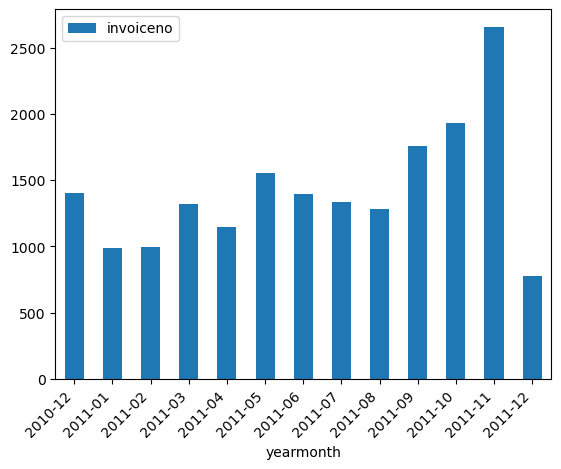

In [21]:
df_new.groupby('yearmonth')['invoiceno'].nunique().plot.bar(label = 'invoiceno')
plt.legend()
plt.xticks(rotation = 45, ha = 'right');

18. Create a bar chart showing the number of unique invoices for the top 10 clients based on this metric.


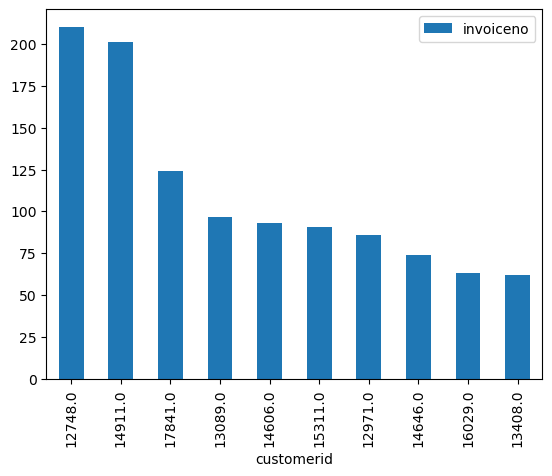

In [22]:
df_new.groupby('customerid')['invoiceno'].nunique().sort_values(ascending = False).head(10).plot.bar(label = 'invoiceno')
plt.legend();

19.Створіть новий датафрейм, що містить сумарний `amountspent` по кожному ідентифікатору клієнта.

In [23]:
new = df_new.groupby('customerid')['amountspent'].sum().reset_index()
new

,customerid,amountspent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


20.Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [24]:
new.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,customerid,amountspent
count,4339.000000,4339.000000
mean,15299.936852,2053.793018
std,1721.889758,8988.248381
min,12346.000000,0.000000
10%,12905.600000,156.566000
25%,13812.500000,307.245000
50%,15299.000000,674.450000
75%,16778.500000,1661.640000
90%,17686.800000,3646.164000
max,18287.000000,280206.020000


21.Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [25]:
new.columns

Index(['customerid', 'amountspent'], dtype='object')

22.Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

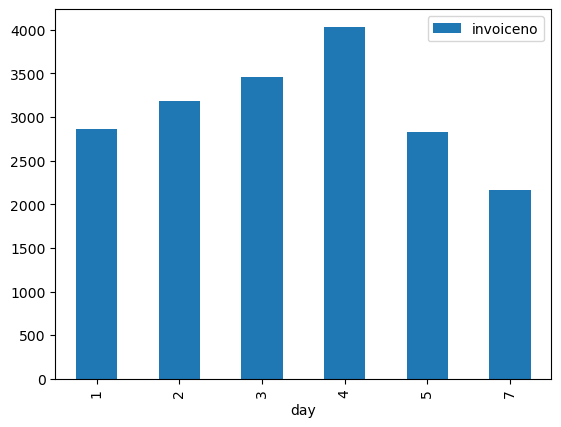

In [26]:
df_new.groupby('day')['invoiceno'].nunique().plot.bar(label = 'invoiceno')
plt.legend();

## Дослідимо продажі на суму 0 умовних одиниць

23.Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [27]:
no_sale = df_new[df_new.amountspent == 0]

### Динаміка продажів на суму 0

24.Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0. 

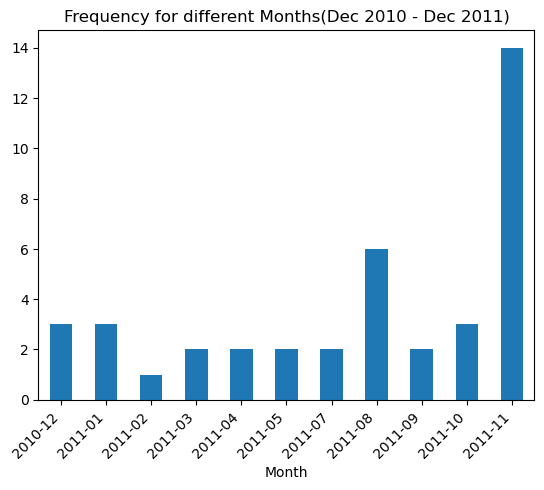

In [28]:
no_sale.groupby('yearmonth')['amountspent'].count().plot.bar()
plt.xticks(rotation = 45, ha = 'right')
plt.title('Frequency for different Months(Dec 2010 - Dec 2011)')
plt.xlabel('Month');

25.Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [29]:
no_sale.groupby('country')['invoiceno'].nunique().sort_values(ascending = False).reset_index()

,country,invoiceno
0,United Kingdom,21
1,Australia,3
2,EIRE,2
3,Germany,2
4,France,1
5,Netherlands,1
6,Norway,1
7,RSA,1
8,Spain,1
9,Switzerland,1


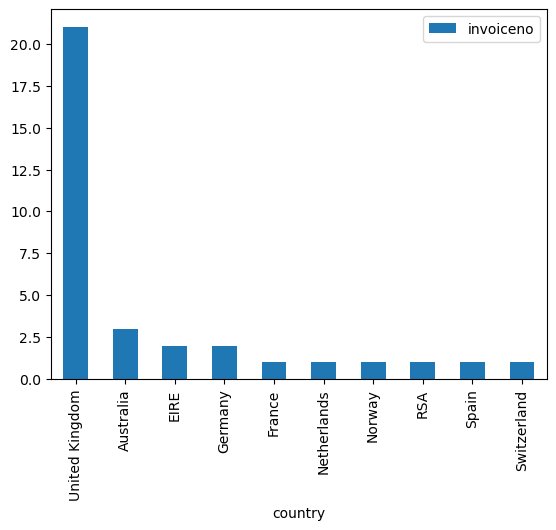

In [30]:
no_sale.groupby('country')['invoiceno'].nunique().sort_values(ascending = False).reset_index().plot.bar(x = 'country');

На цій діаграмі бачимо кількість унікальних інвойсів з сумою 0 по місяцях.

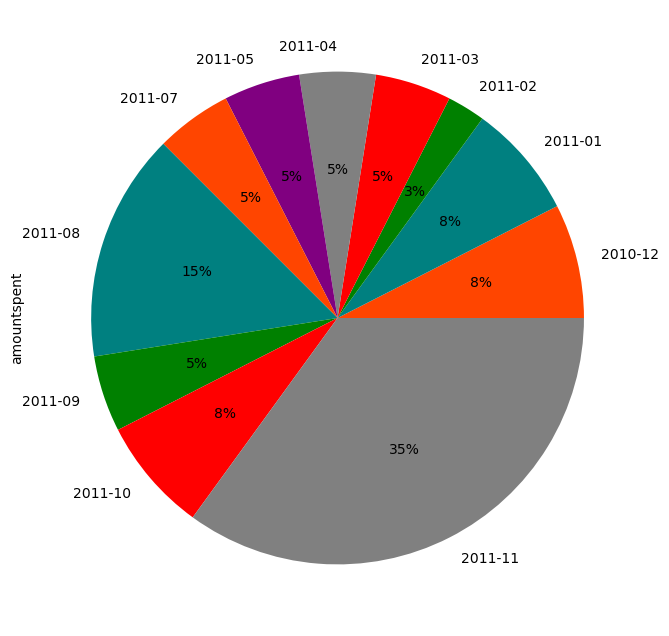

In [31]:
no_sale.groupby('yearmonth')['amountspent'].count().plot(kind = 'pie', y = 'amountspent', autopct = '%1.0f%%', colors=['orangered', 'teal', 'green', 'red', 'gray', 'purple'], figsize = (8, 8));

In [32]:
df_new.groupby('country')['amountspent'].sum().sort_values()

country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              